In [1]:
# Install Libraries
# !pip install textblob tweepy pycountry wordcloud langdetect

In [2]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
# nltk.download('vader_lexicon')
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# Authentication
consumer_key = 'your consumer key'
consumer_secret = 'your consumer secret'
access_token = 'your access token'
access_token_secret = 'your access token secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
def percentage(part, whole):
    return 100 * float(part) / float(whole)


keyword = input('Please enter keyword or hashtag to search: ')
noOfTweet = int(input('Please enter how many tweets to analyze: '))
tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:

    # print(tweet.text)

    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: jokowi 3 periode
Please enter how many tweets to analyze: 2000


In [5]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2000
positive number:  34
negative number:  59
neutral number:  1907


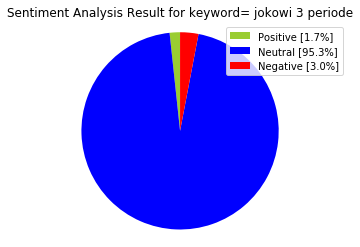

In [6]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

In [7]:
tweet_list.drop_duplicates(inplace = True)

In [20]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"@msaid_didu Jika Jokowi 3 periode,Pendeta Syai...",didu jika jokowi 3 periode pendeta syaifudin...,0.0,0.0,neutral,NaN,NaN,NaN,NaN
1,@sasasayatusa_ Karena jokowi adalah presiden t...,karena jokowi adalah presiden terbaik selam...,0.0,0.0,neutral,NaN,NaN,NaN,NaN
2,"New Post: Kabur Saat Di Demo Mahasiswa, Jokowi...",new post kabur saat di demo mahasiswa jokowi...,0.0,0.0,neutral,NaN,NaN,NaN,NaN
3,@BossTemlen @Dennysiregar7 Kudeta itu merusak ...,7 kudeta itu merusak sistem sehabis kudet...,0.0,0.0,neutral,NaN,NaN,NaN,NaN
4,RT @NichoSilalah1: Sekarang ramai - ramai tola...,sekarang ramai ramai tolak 3 periode maupun...,0.0,0.0,neutral,NaN,NaN,NaN,NaN
5,"@sasasayatusa_ Wacana Presiden 3 Periode, Joko...",wacana presiden 3 periode jokowi waspadai ...,0.0,0.0,neutral,NaN,NaN,NaN,NaN
6,@sasasayatusa_ Gibran: Jokowi Tolak 3 Periode,gibran jokowi tolak 3 periode,0.0,0.0,neutral,NaN,NaN,NaN,NaN
7,RT @D_N4bil5: Hutang itu ada rasio nya! \nAda ...,hutang itu ada rasio nya ada uu nya amp ...,0.0,0.0,neutral,NaN,NaN,NaN,NaN
8,"RT @chinta_chintata: STOP PROVOKASI, MAU LOE A...",stop provokasi mau loe apa lagi sudah b...,0.0,0.0,neutral,NaN,NaN,NaN,NaN
9,RT @Ranisor: Menteri Polhukam Mahfud MD sampai...,menteri polhukam mahfud md sampaikan terkait ...,0.0,0.0,neutral,NaN,NaN,NaN,NaN


In [21]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
        
tw_list.loc[index, 'neg'] = neg
tw_list.loc[index, 'neu'] = neu
tw_list.loc[index, 'pos'] = pos
tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"@msaid_didu Jika Jokowi 3 periode,Pendeta Syai...",didu jika jokowi 3 periode pendeta syaifudin...,0.000000,0.000000,neutral,NaN,NaN,NaN,NaN
1,@sasasayatusa_ Karena jokowi adalah presiden t...,karena jokowi adalah presiden terbaik selam...,0.000000,0.000000,neutral,NaN,NaN,NaN,NaN
2,"New Post: Kabur Saat Di Demo Mahasiswa, Jokowi...",new post kabur saat di demo mahasiswa jokowi...,0.136364,0.454545,neutral,NaN,NaN,NaN,NaN
3,@BossTemlen @Dennysiregar7 Kudeta itu merusak ...,7 kudeta itu merusak sistem sehabis kudet...,0.000000,0.000000,neutral,NaN,NaN,NaN,NaN
4,RT @NichoSilalah1: Sekarang ramai - ramai tola...,sekarang ramai ramai tolak 3 periode maupun...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN
5,"@sasasayatusa_ Wacana Presiden 3 Periode, Joko...",wacana presiden 3 periode jokowi waspadai ...,0.000000,0.000000,neutral,NaN,NaN,NaN,NaN
6,@sasasayatusa_ Gibran: Jokowi Tolak 3 Periode,gibran jokowi tolak 3 periode,0.000000,0.000000,neutral,NaN,NaN,NaN,NaN
7,RT @D_N4bil5: Hutang itu ada rasio nya! \nAda ...,hutang itu ada rasio nya ada uu nya amp ...,0.000000,0.000000,neutral,NaN,NaN,NaN,NaN
8,"RT @chinta_chintata: STOP PROVOKASI, MAU LOE A...",stop provokasi mau loe apa lagi sudah b...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN
9,RT @Ranisor: Menteri Polhukam Mahfud MD sampai...,menteri polhukam mahfud md sampaikan terkait ...,0.000000,0.000000,neutral,NaN,NaN,NaN,NaN


In [22]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [23]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,806,95.38
negative,25,2.96
positive,14,1.66


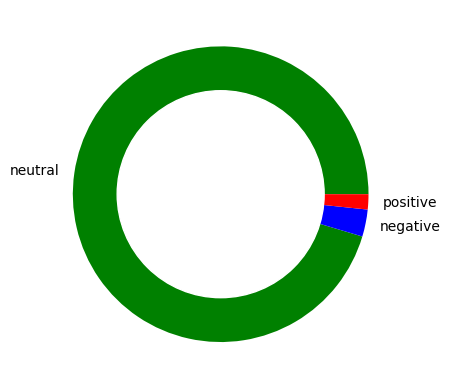

In [24]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [25]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                   mask = mask,
                   max_words=3000,
                   stopwords=stopwords,
                   repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [27]:
# tw_list

Word Cloud Saved Successfully


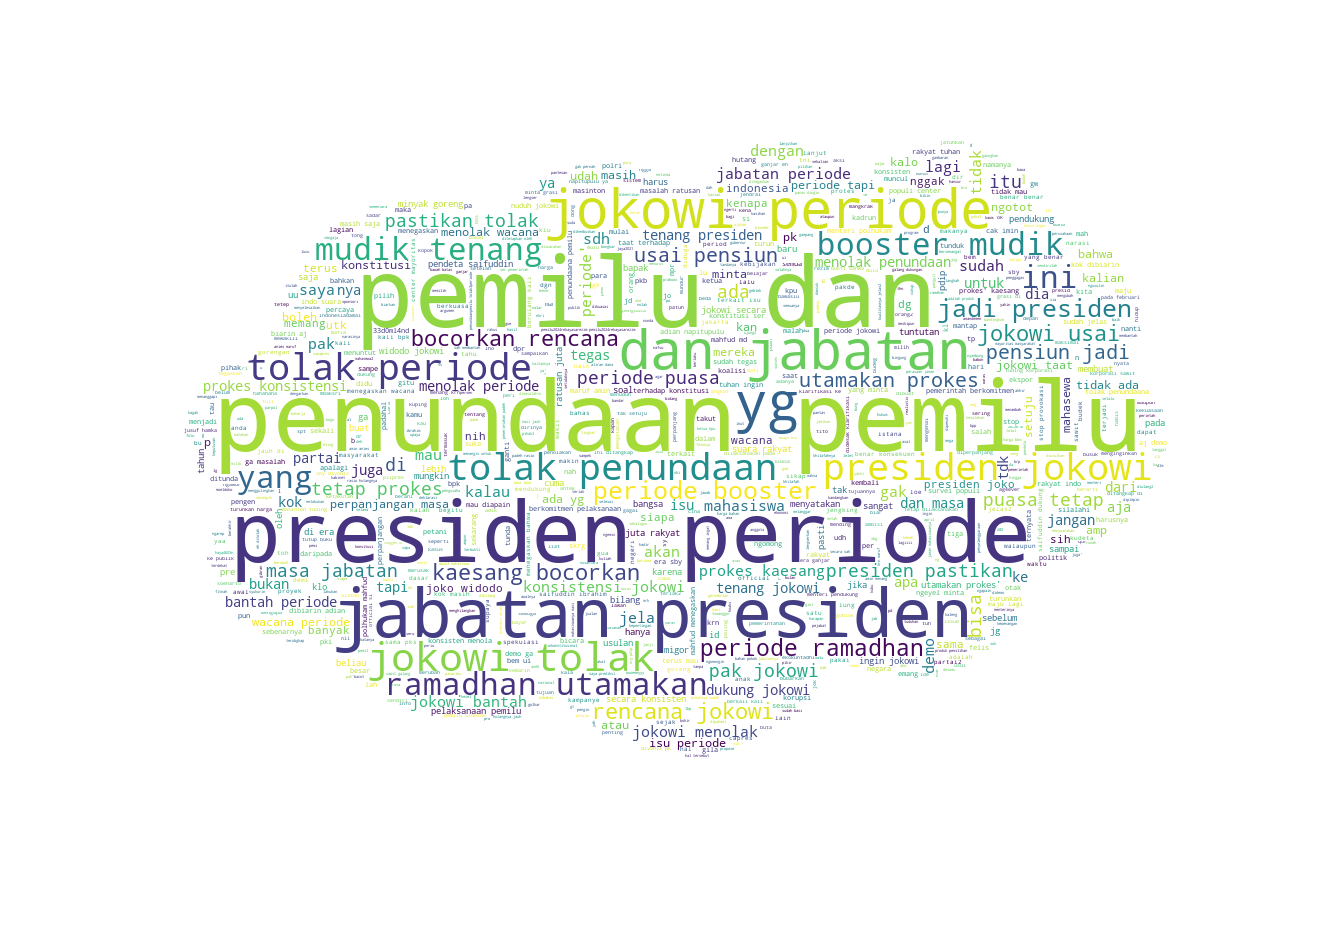

In [28]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


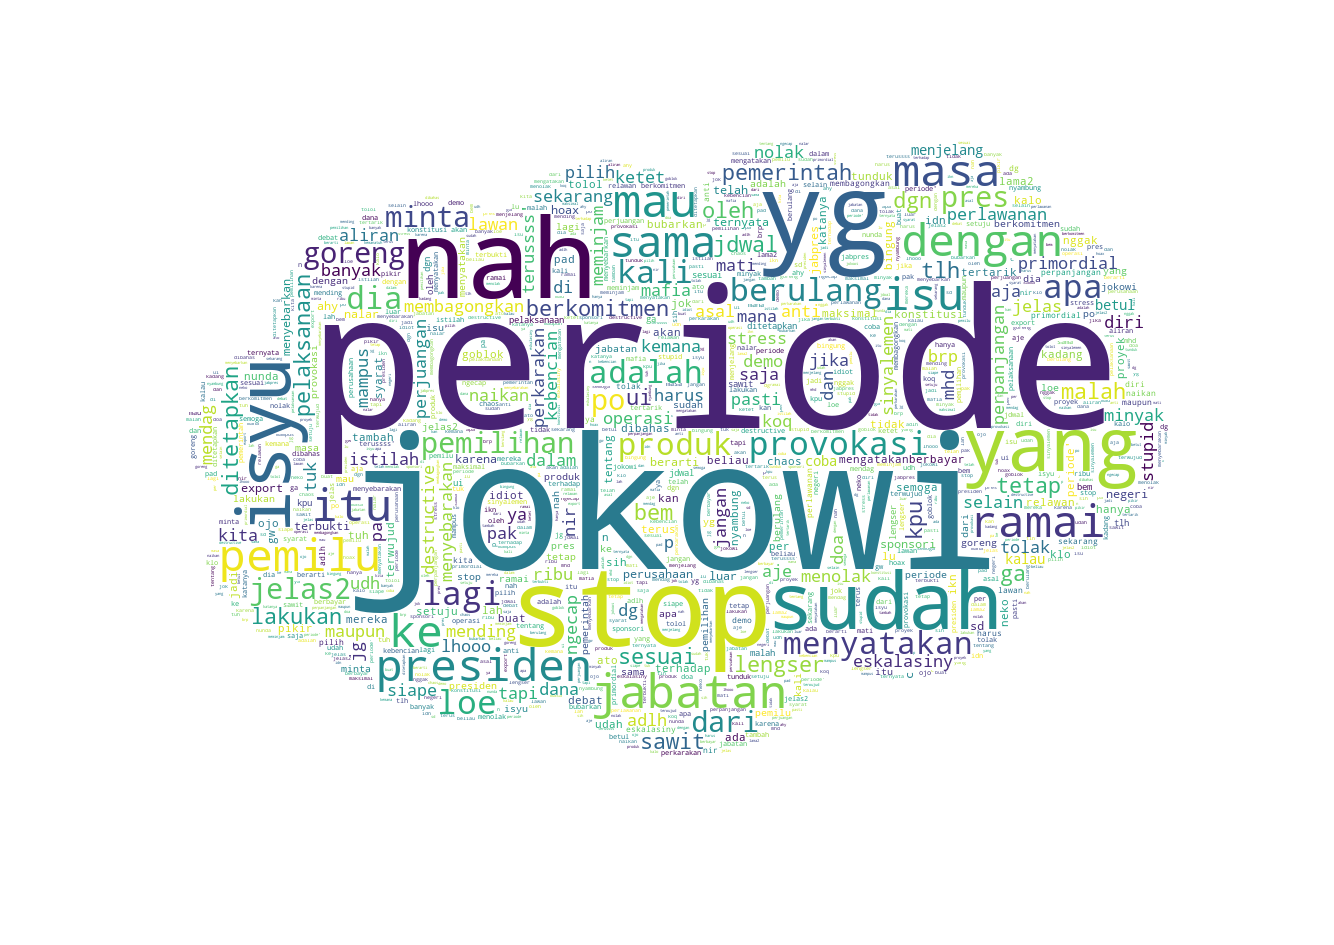

In [29]:
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


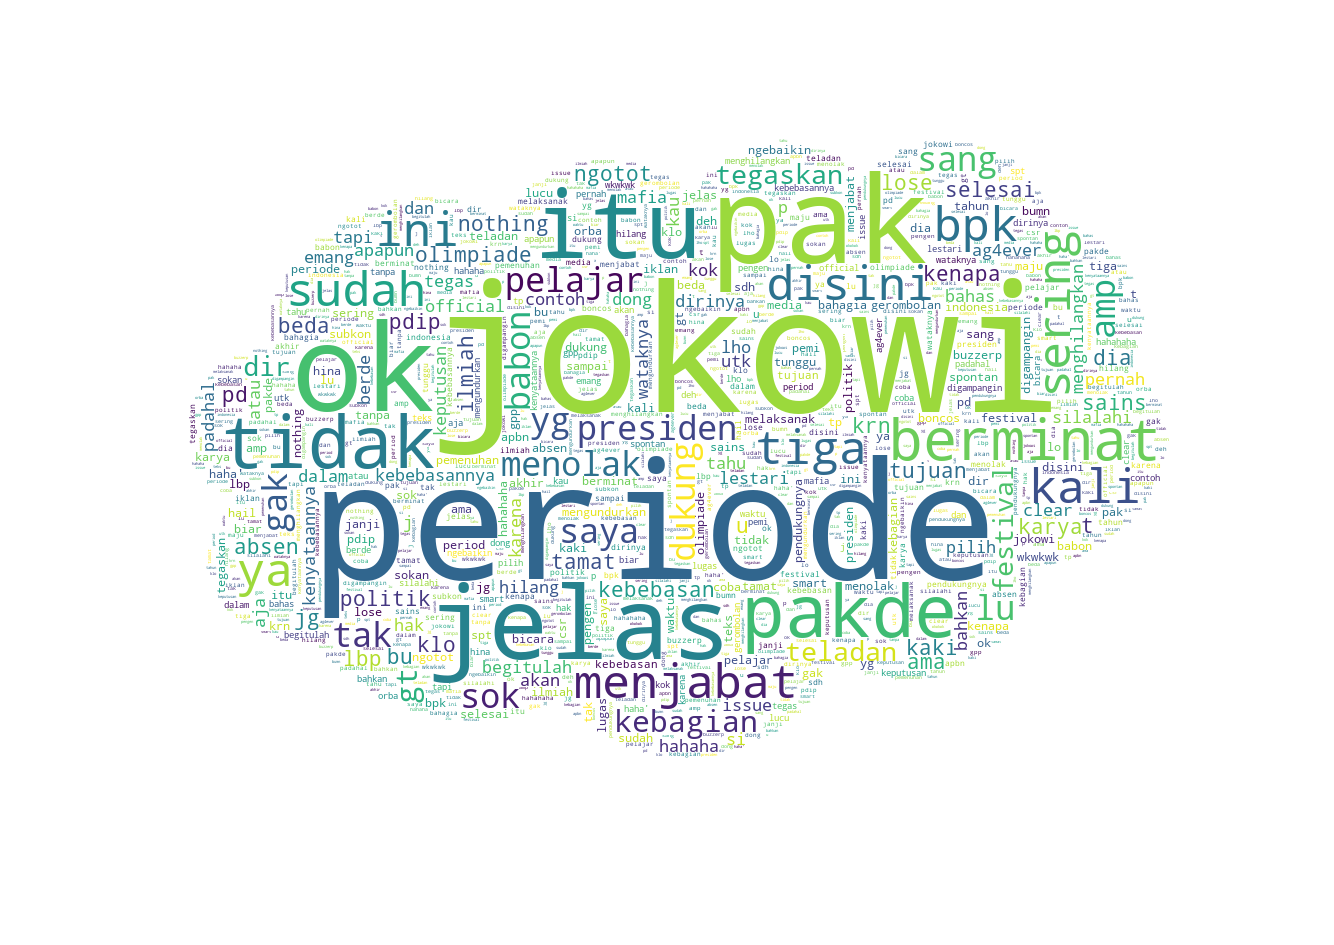

In [30]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

In [31]:
#Calculating tweet’s lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,93.36
neutral,95.38
positive,104.64


In [32]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,14.24
neutral,14.06
positive,16.29


In [33]:
#Removing Punctuation
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0–9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [34]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,"@msaid_didu Jika Jokowi 3 periode,Pendeta Syai...",didu jika jokowi 3 periode pendeta syaifudin...,0.000000,0.000000,neutral,NaN,NaN,NaN,NaN,113,17,didu jika jokowi 3 periode pendeta syaifudin...,"[, didu, jika, jokowi, 3, periode, pendeta, sy...","[, didu, jika, jokowi, 3, periode, pendeta, sy...","[, didu, jika, jokowi, 3, period, pendeta, sya..."
1,@sasasayatusa_ Karena jokowi adalah presiden t...,karena jokowi adalah presiden terbaik selam...,0.000000,0.000000,neutral,NaN,NaN,NaN,NaN,76,12,karena jokowi adalah presiden terbaik selam...,"[, karena, jokowi, adalah, presiden, terbaik, ...","[, karena, jokowi, adalah, presiden, terbaik, ...","[, karena, jokowi, adalah, presiden, terbaik, ..."
2,"New Post: Kabur Saat Di Demo Mahasiswa, Jokowi...",new post kabur saat di demo mahasiswa jokowi...,0.136364,0.454545,neutral,NaN,NaN,NaN,NaN,118,18,new post kabur saat di demo mahasiswa jokowi...,"[new, post, kabur, saat, di, demo, mahasiswa, ...","[new, post, kabur, saat, di, demo, mahasiswa, ...","[new, post, kabur, saat, di, demo, mahasiswa, ..."
3,@BossTemlen @Dennysiregar7 Kudeta itu merusak ...,7 kudeta itu merusak sistem sehabis kudet...,0.000000,0.000000,neutral,NaN,NaN,NaN,NaN,96,15,7 kudeta itu merusak sistem sehabis kudet...,"[, 7, kudeta, itu, merusak, sistem, sehabis, k...","[, 7, kudeta, itu, merusak, sistem, sehabis, k...","[, 7, kudeta, itu, merusak, sistem, sehabi, ku..."
4,RT @NichoSilalah1: Sekarang ramai - ramai tola...,sekarang ramai ramai tolak 3 periode maupun...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN,122,17,sekarang ramai ramai tolak 3 periode maupun...,"[, sekarang, ramai, ramai, tolak, 3, periode, ...","[, sekarang, ramai, ramai, tolak, 3, periode, ...","[, sekarang, ramai, ramai, tolak, 3, period, m..."


In [40]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print("{} Number of reviews has {} words".format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())
# 1281 Number of reviews has 2966 words
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

845 Number of reviews has 2105 words


,,aamiin,ab,abi,abrik,absen,abu,acara,action,ada,...,yakin,yakni,yampun,yan,yang,yg,yo,yuu,zangan,zeebo
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
period,674
jokowi,641
presiden,354
dan,217
tolak,203
pemilu,193
jabatan,182
penundaan,162
proke,132
yg,111


In [42]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)
n2_bigrams

[('penundaan pemilu', 150),
 ('pemilu dan', 124),
 ('presiden periode', 123),
 ('jokowi periode', 122),
 ('jabatan presiden', 121),
 ('dan jabatan', 97),
 ('jokowi tolak', 96),
 ('tolak penundaan', 86),
 ('tolak periode', 83),
 ('presiden jokowi', 81),
 ('utamakan prokes', 75),
 ('ramadhan utamakan', 74),
 ('booster mudik', 69),
 ('mudik tenang', 69),
 ('periode booster', 67),
 ('jadi presiden', 66),
 ('kaesang bocorkan', 64),
 ('bocorkan rencana', 64),
 ('rencana jokowi', 64),
 ('jokowi usai', 64)]

In [43]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)
n3_trigrams

[('penundaan pemilu dan', 117),
 ('jabatan presiden periode', 108),
 ('pemilu dan jabatan', 96),
 ('tolak penundaan pemilu', 85),
 ('dan jabatan presiden', 85),
 ('jokowi tolak penundaan', 77),
 ('ramadhan utamakan prokes', 73),
 ('booster mudik tenang', 68),
 ('periode booster mudik', 67),
 ('kaesang bocorkan rencana', 64),
 ('bocorkan rencana jokowi', 64),
 ('rencana jokowi usai', 64),
 ('jokowi usai pensiun', 63),
 ('usai pensiun jadi', 63),
 ('pensiun jadi presiden', 63),
 ('jadi presiden pastikan', 63),
 ('presiden pastikan tolak', 63),
 ('pastikan tolak periode', 63),
 ('periode ramadhan utamakan', 58),
 ('puasa tetap prokes', 56)]